In [39]:
import pandas as pd
import numpy as np

# Đọc file Excel chứa dữ liệu tiêu thụ nước
file_path = '/content/drive/MyDrive/dulieutieuthunuoc.xlsx'  # Đặt đúng đường dẫn nếu cần
df = pd.read_excel(file_path)

# In ra một số dòng dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(df.head())

# Chuẩn hóa tên cột để tránh lỗi
df.rename(columns=lambda x: x.strip(), inplace=True)

# 1. Chuyển cột thời gian về đúng định dạng
if 'Thời gian' in df.columns:
    df['Thời gian'] = pd.to_datetime(df['Thời gian'], errors='coerce')

# 2. Xử lý giá trị âm trong cột "Lượng nước tiêu thụ (m³)"
if 'Lượng nước tiêu thụ (m³)' in df.columns:
    df['Lượng nước tiêu thụ (m³)'] = df['Lượng nước tiêu thụ (m³)'].apply(lambda x: abs(x) if x < 0 else x)

# 3. Lọc giá trị tiêu thụ nước bất thường (quá lớn)
if 'Lượng nước tiêu thụ (m³)' in df.columns:
    threshold = df['Lượng nước tiêu thụ (m³)'].quantile(0.99)  # Ngưỡng 99%
    max_valid_value = df['Lượng nước tiêu thụ (m³)'].median() + (1.5 * df['Lượng nước tiêu thụ (m³)'].std())
    df['Lượng nước tiêu thụ (m³)'] = df['Lượng nước tiêu thụ (m³)'].apply(lambda x: max_valid_value if x > threshold else x)

# 4. Xử lý giá trị sai lệch trong "Đơn giá nước (VNĐ/m³)"
if 'Đơn giá nước (VNĐ/m³)' in df.columns:
    min_price = df['Đơn giá nước (VNĐ/m³)'].median() * 0.7  # Giá nước không nên quá thấp (dưới 70% trung vị)
    df['Đơn giá nước (VNĐ/m³)'] = df['Đơn giá nước (VNĐ/m³)'].apply(lambda x: min_price if x < min_price else x)

# 5. Xử lý giá trị thiếu bằng trung vị
for col in ['Lượng nước tiêu thụ (m³)', 'Số nhân khẩu', 'Nhiệt độ trung bình (°C)']:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# In ra dữ liệu sau khi làm sạch
print("\nDữ liệu sau khi làm sạch:")
print(df.head())

# Lưu lại file Excel sau khi làm sạch
cleaned_file_path = '/content/drive/MyDrive/dulieutieuthunuoc_cleaned.xlsx'
df.to_excel(cleaned_file_path, index=False)
print(f"\nFile đã làm sạch được lưu thành '{cleaned_file_path}'")


Dữ liệu ban đầu:
  Mã khách hàng Thời gian Tên khách hàng      Địa chỉ  \
0         KH001   01/2024  Nguyễn Văn An  Bắc Từ Liêm   
1         KH001   02/2024  Nguyễn Văn An  Bắc Từ Liêm   
2         KH001   03/2024  Nguyễn Văn An  Bắc Từ Liêm   
3         KH001   04/2024  Nguyễn Văn An  Bắc Từ Liêm   
4         KH001   05/2024  Nguyễn Văn An  Bắc Từ Liêm   

   Lượng nước tiêu thụ (m³)  Chỉ số nước cũ (m³)  Chỉ số nước mới (m³)  \
0                        53                  208                   261   
1                        43                  261                   304   
2                        29                  304                   333   
3                        57                  333                   390   
4                        22                  390                   412   

   Đơn giá nước (VNĐ/m³)  Tiền nước (VNĐ, chưa thuế)  Thuế GTGT (VNĐ)  \
0                  10341                      548073            54807   
1                  11596                      498

<ipython-input-39-cf68925eba7d>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Thời gian'] = pd.to_datetime(df['Thời gian'], errors='coerce')
<ipython-input-39-cf68925eba7d>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Dữ liệu đã làm sạch:
  Mã khách hàng  Thời gian Tên khách hàng      Địa chỉ  \
0         KH001 2024-01-01  Nguyễn Văn An  Bắc Từ Liêm   
1         KH001 2024-02-01  Nguyễn Văn An  Bắc Từ Liêm   
2         KH001 2024-03-01  Nguyễn Văn An  Bắc Từ Liêm   
3         KH001 2024-04-01  Nguyễn Văn An  Bắc Từ Liêm   
4         KH001 2024-05-01  Nguyễn Văn An  Bắc Từ Liêm   

   Lượng nước tiêu thụ (m³)  Chỉ số nước cũ (m³)  Chỉ số nước mới (m³)  \
0                        53                  208                   261   
1                        43                  261                   304   
2                        29                  304                   333   
3                        57                  333                   390   
4                        22                  390                   412   

   Đơn giá nước (VNĐ/m³)  Tiền nước (VNĐ, chưa thuế)  Thuế GTGT (VNĐ)  \
0                10341.0                      548073            54807   
1                11596.0               

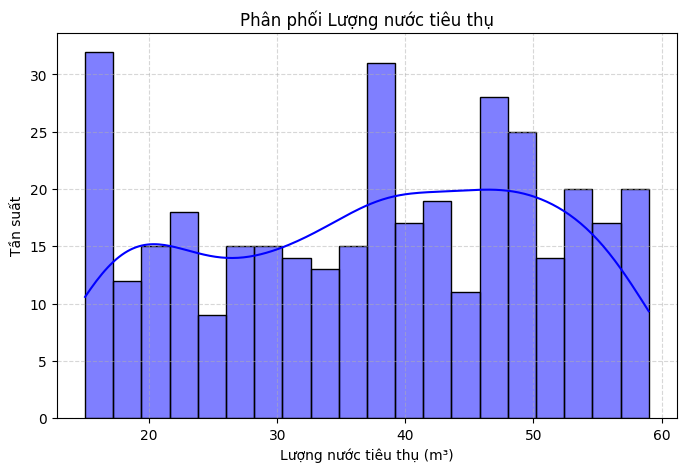

<ipython-input-38-0dda8653d7fa>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Địa chỉ', y='Lượng nước tiêu thụ', data=grouped_data, palette='coolwarm')


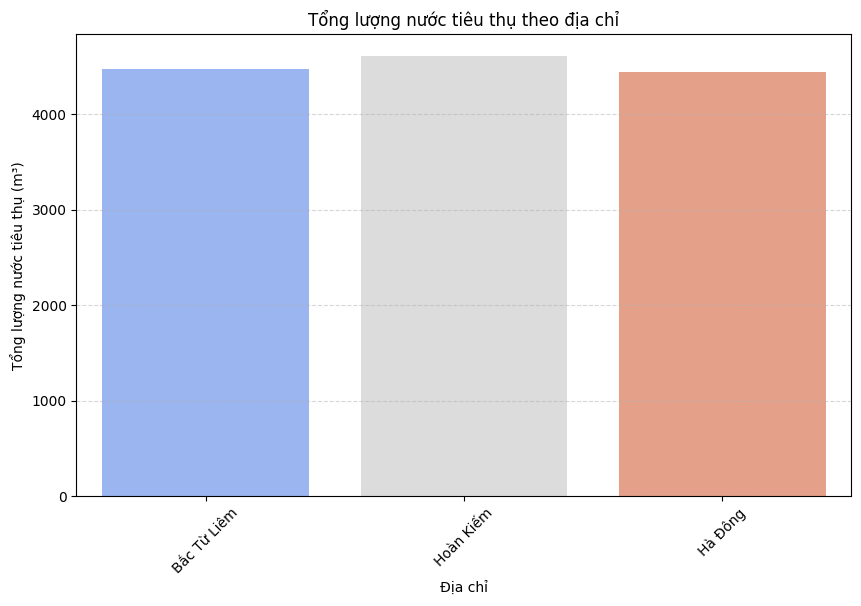

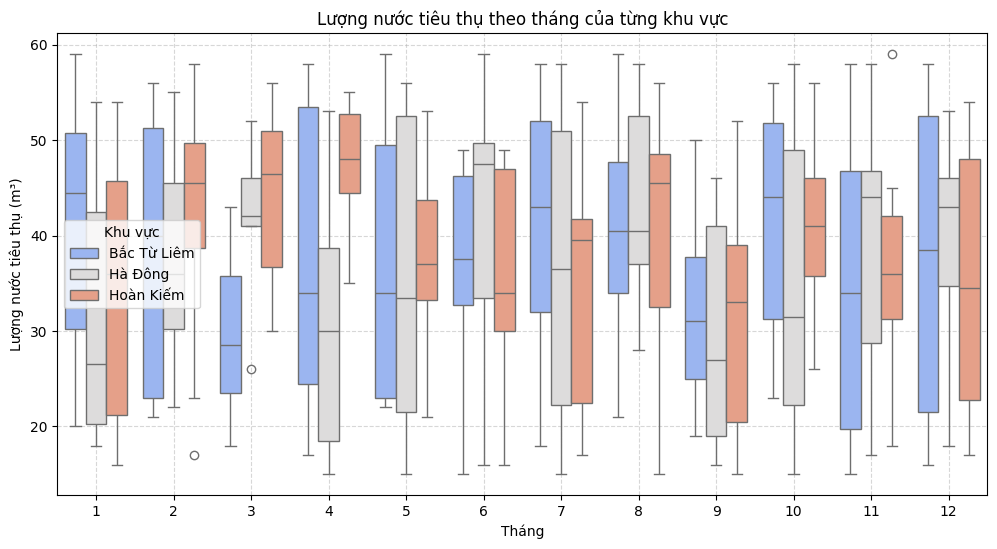


📊 Kết quả dự đoán nhu cầu mùa khô:
MAE (Sai số tuyệt đối trung bình): 12.12
MSE (Sai số bình phương trung bình): 193.46
RMSE (Căn bậc hai MSE): 13.91


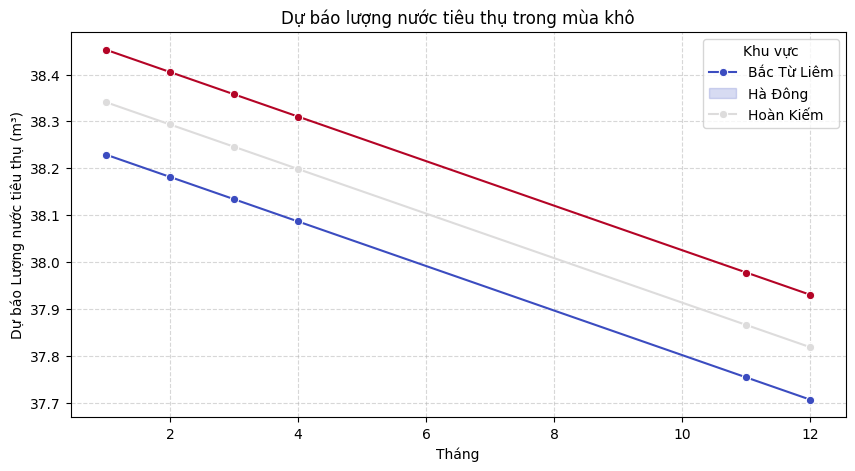

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ===================== 1️⃣ ĐỌC & LÀM SẠCH DỮ LIỆU ===================== #
# Đọc file Excel đã làm sạch
file_path = '/content/drive/MyDrive/dulieutieuthunuoc_cleaned.xlsx'
df = pd.read_excel(file_path)

# 📝 In ra một số dòng dữ liệu ban đầu
print("Dữ liệu đã làm sạch:")
print(df.head())

# Chuẩn hóa tên cột để tránh lỗi
df.columns = df.columns.str.strip()  # Xóa khoảng trắng thừa
df.columns = df.columns.str.replace(r'\s*\(.*\)', '', regex=True)  # Xóa ký tự trong ngoặc

# Kiểm tra & chuẩn hóa cột thời gian
if 'Thời gian' in df.columns:
    df['Thời gian'] = pd.to_datetime(df['Thời gian'], errors='coerce')
    df['Tháng'] = df['Thời gian'].dt.month

# Kiểm tra xem tất cả các cột quan trọng có tồn tại không
required_columns = ['Thời gian', 'Địa chỉ', 'Lượng nước tiêu thụ', 'Nhiệt độ trung bình', 'Số nhân khẩu']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"⚠️ Cột '{col}' không tồn tại! Tên cột hiện có: {df.columns.tolist()}")

# ===================== 2️⃣ PHÂN TÍCH & TRỰC QUAN HÓA ===================== #
# 🔹 Biểu đồ phân phối lượng nước tiêu thụ
plt.figure(figsize=(8, 5))
sns.histplot(df['Lượng nước tiêu thụ'], bins=20, kde=True, color='blue')
plt.title("Phân phối Lượng nước tiêu thụ")
plt.xlabel("Lượng nước tiêu thụ (m³)")
plt.ylabel("Tần suất")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 🔹 Biểu đồ cột tổng lượng nước tiêu thụ theo địa chỉ
plt.figure(figsize=(10, 6))
grouped_data = df.groupby('Địa chỉ')['Lượng nước tiêu thụ'].sum().reset_index()
sns.barplot(x='Địa chỉ', y='Lượng nước tiêu thụ', data=grouped_data, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Tổng lượng nước tiêu thụ theo địa chỉ")
plt.xlabel("Địa chỉ")
plt.ylabel("Tổng lượng nước tiêu thụ (m³)")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

# 🔹 Biểu đồ boxplot lượng nước tiêu thụ theo tháng của từng địa chỉ
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tháng', y='Lượng nước tiêu thụ', hue='Địa chỉ', data=df, palette="coolwarm")
plt.title("Lượng nước tiêu thụ theo tháng của từng khu vực")
plt.xlabel("Tháng")
plt.ylabel("Lượng nước tiêu thụ (m³)")
plt.legend(title="Khu vực")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ===================== 3️⃣ DỰ ĐOÁN NHU CẦU MÙA KHÔ ===================== #
# Chọn dữ liệu của các tháng mùa khô (Tháng 11 - 4)
df_kho = df[df['Tháng'].isin([11, 12, 1, 2, 3, 4])].copy()

# Mã hóa địa chỉ thành số (Bắc Từ Liêm = 0, Hà Đông = 1, Hoàn Kiếm = 2)
df_kho['Địa chỉ'] = df_kho['Địa chỉ'].astype('category').cat.codes

# Xác định biến đầu vào (features) và biến mục tiêu (target)
features = ['Tháng', 'Địa chỉ', 'Nhiệt độ trung bình', 'Số nhân khẩu']
target = 'Lượng nước tiêu thụ'

# Tách tập dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df_kho[features], df_kho[target], test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📊 Kết quả dự đoán nhu cầu mùa khô:")
print(f"MAE (Sai số tuyệt đối trung bình): {mae:.2f}")
print(f"MSE (Sai số bình phương trung bình): {mse:.2f}")
print(f"RMSE (Căn bậc hai MSE): {rmse:.2f}")

# ===================== 4️⃣ DỰ BÁO LƯỢNG NƯỚC TIÊU THỤ TRONG MÙA KHÔ TIẾP THEO ===================== #
# Tạo tập dữ liệu giả định cho mùa khô tiếp theo
future_months = [11, 12, 1, 2, 3, 4]
future_data = []
for thang in future_months:
    for diachi in range(3):  # 3 khu vực: Bắc Từ Liêm (0), Hà Đông (1), Hoàn Kiếm (2)
        temp = df_kho['Nhiệt độ trung bình'].mean()  # Trung bình nhiệt độ mùa khô
        nhankhau = df_kho['Số nhân khẩu'].median()  # Trung bình số nhân khẩu
        future_data.append([thang, diachi, temp, nhankhau])

# Chuyển thành DataFrame
future_df = pd.DataFrame(future_data, columns=features)

# Dự báo lượng nước tiêu thụ
future_df['Dự báo lượng nước tiêu thụ'] = model.predict(future_df)

# Biểu đồ xu hướng dự báo mùa khô
plt.figure(figsize=(10, 5))
sns.lineplot(x=future_df['Tháng'], y=future_df['Dự báo lượng nước tiêu thụ'], hue=future_df['Địa chỉ'], palette="coolwarm", marker="o")
plt.title("Dự báo lượng nước tiêu thụ trong mùa khô")
plt.xlabel("Tháng")
plt.ylabel("Dự báo Lượng nước tiêu thụ (m³)")
plt.legend(title="Khu vực", labels=["Bắc Từ Liêm", "Hà Đông", "Hoàn Kiếm"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
